## 1. Load  the  training  and  testing  dataset  provided  with  this  lab  and  join  the  Kaggle competition.

In [531]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [532]:
df = pd.read_csv("x_train.csv")
df1 = pd.read_csv("y_train.csv",usecols = ['target'])
test = pd.read_csv('x_test.csv')

In [533]:
train = pd.concat([df,df1],axis=1)

In [534]:
train.head()

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22,0.0
1,631,city_94,0.698,Male,Has relevent experience,NaN,High School,NaN,3,NaN,NaN,1,22,1.0
2,669,city_114,0.926,NaN,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88,0.0
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,NaN,NaN,4,91,0.0
4,2341,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92,0.0


In [535]:
test.head()

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16834,city_104,0.924,Male,Has relevent experience,no_enrollment,Primary School,NaN,15,100-500,Pvt Ltd,2,58
1,15437,city_114,0.926,Male,No relevent experience,no_enrollment,Masters,STEM,>20,10000+,Pvt Ltd,>4,308
2,8549,city_83,0.923,Male,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,8
3,7222,city_103,0.920,Male,No relevent experience,no_enrollment,Primary School,NaN,6,NaN,NaN,never,85
4,17054,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,7,500-999,NaN,1,3


In [536]:
train['target'].value_counts()

0.0    10805
1.0     3563
Name: target, dtype: int64

/Users/priyankjagad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

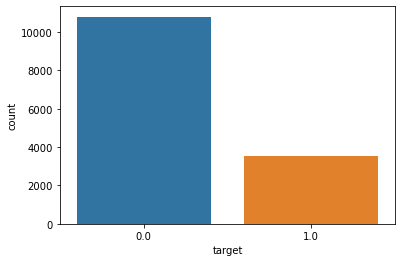

In [538]:
sns.countplot(train['target'])

/Users/priyankjagad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total Count')

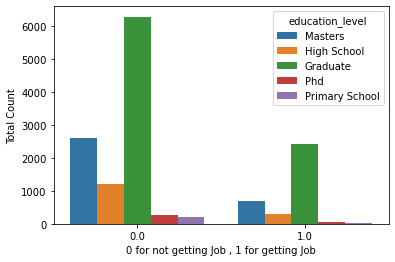

In [282]:
gfg = sns.countplot('target',hue = "education_level",data=train)
gfg.set_xlabel('0 for not getting Job , 1 for getting Job')
gfg.set_ylabel("Total Count")

In [283]:
train.columns

Index(['index', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

## 2. Explain in your own words what is NOIR classification of data.

NOIR Classification is used for classification of varibles in our data. It is classified mainly into four categories.
1) Nominal: The feature is classified as nominal if there is no order among the values in features. All the values of that feature have equal importance.

2) Ordinal: The feature is classified as ordinal if the values of features have rank or order among them. For ex: Type Of Employee: Senior, Junior CEO.

3) Interval:  items that have a measurable distance between them. For ex size of company:[0-100,500-1000]

4) Ratio: Items have meaningful zero or the lowest value of the item is zero. For ex temprature measured in Kalvin

## 3. Classify the given dataset features into NOIR categories

In [284]:
N = 'Nominal'
O = 'Ordinal'
I = 'Interval'
R = "Ratio"

In [285]:
NOIR_Classification={'index':N,
                   "city":N,
                   "city_development_index":N,
                   "gender":N,
                   "relevent_experience":O,
                   "enrolled_university":O,
                   "education_level":O,
                   'major_discipline':N,
                   "company_size":I,
                   "company_type":N,
                   "last_new_job":O,
                   "training_hours":O,
                    "target":O
                   }

In [286]:
for key,value in NOIR_Classification.items():
    print(f"Column: {key}\t\t Classification Type :{value}")
    

Column: index		 Classification Type :Nominal
Column: city		 Classification Type :Nominal
Column: city_development_index		 Classification Type :Nominal
Column: gender		 Classification Type :Nominal
Column: relevent_experience		 Classification Type :Ordinal
Column: enrolled_university		 Classification Type :Ordinal
Column: education_level		 Classification Type :Ordinal
Column: major_discipline		 Classification Type :Nominal
Column: company_size		 Classification Type :Interval
Column: company_type		 Classification Type :Nominal
Column: last_new_job		 Classification Type :Ordinal
Column: training_hours		 Classification Type :Ordinal
Column: target		 Classification Type :Ordinal


## 4 Summarize the Dataset

### a. Number of columns and rows present

In [287]:
print("Total Number of Rows",train.shape[0])
print("Total Number of Columns",train.shape[1])

Total Number of Rows 14368
Total Number of Columns 14


### b. in, max, avg, std dev etc. stats for continuous features 

In [288]:
print(f"The following table Shows Statistics of continuous columns in given dataset\n{'-'*100}")
df.describe()

The following table Shows Statistics of continuous columns in given dataset
----------------------------------------------------------------------------------------------------


,index,city_development_index,training_hours
count,14368.000000,14368.000000,14368.000000
mean,9634.231765,0.828252,65.396645
std,5522.764568,0.123419,60.277583
min,0.000000,0.448000,1.000000
25%,4840.750000,0.738000,23.000000
50%,9693.500000,0.899000,47.000000
75%,14405.250000,0.920000,88.000000
max,19157.000000,0.949000,336.000000


### C. Number of unique values for categorical features

In [513]:
for column in df.columns:
    if column not in df.select_dtypes(exclude=['object']):
        print(f'Number of unique values of {column} columns are {df[column].nunique()}')

Number of unique values of city columns are 123
Number of unique values of gender columns are 3
Number of unique values of relevent_experience columns are 2
Number of unique values of enrolled_university columns are 3
Number of unique values of education_level columns are 5
Number of unique values of major_discipline columns are 6
Number of unique values of experience columns are 22
Number of unique values of company_size columns are 8
Number of unique values of company_type columns are 6
Number of unique values of last_new_job columns are 6


### D. Number of nulls and Nans in each column

In [290]:
for column in df.columns:
    print(f' There are total {sum(df[column].isna())} missing values in {column} column')

 There are total 0 missing values in index column
 There are total 0 missing values in city column
 There are total 0 missing values in city_development_index column
 There are total 3393 missing values in gender column
 There are total 0 missing values in relevent_experience column
 There are total 292 missing values in enrolled_university column
 There are total 338 missing values in education_level column
 There are total 2089 missing values in major_discipline column
 There are total 45 missing values in experience column
 There are total 4430 missing values in company_size column
 There are total 4598 missing values in company_type column
 There are total 327 missing values in last_new_job column
 There are total 0 missing values in training_hours column


### E. Visualize distribution of each feature using graphs

In [292]:
def plot_distribution(df):
    df_numerical = df.select_dtypes(exclude=['object'])
    df_cat = df.select_dtypes(exclude=['int64','float64'])
    for col in df_numerical:
        figure = plt.figure(figsize=(15,6))
        sns.displot(df,x=col)
        plt.show()
    for col in df_cat:
        figure = plt.figure(figsize=(15,6))
        sns.countplot(x=col,data=df)
        plt.show()

<Figure size 1080x432 with 0 Axes>

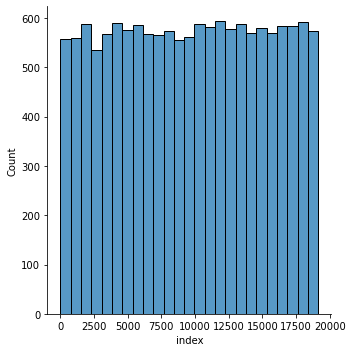

<Figure size 1080x432 with 0 Axes>

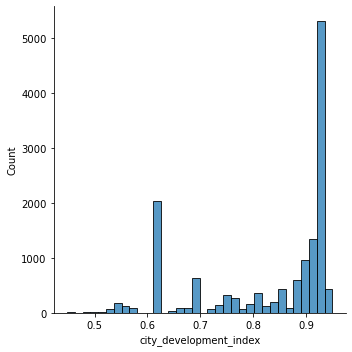

<Figure size 1080x432 with 0 Axes>

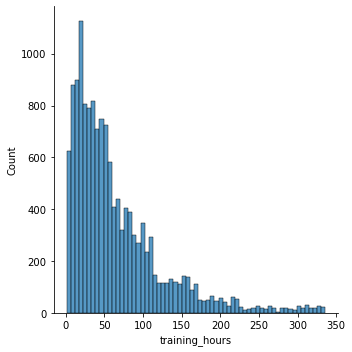

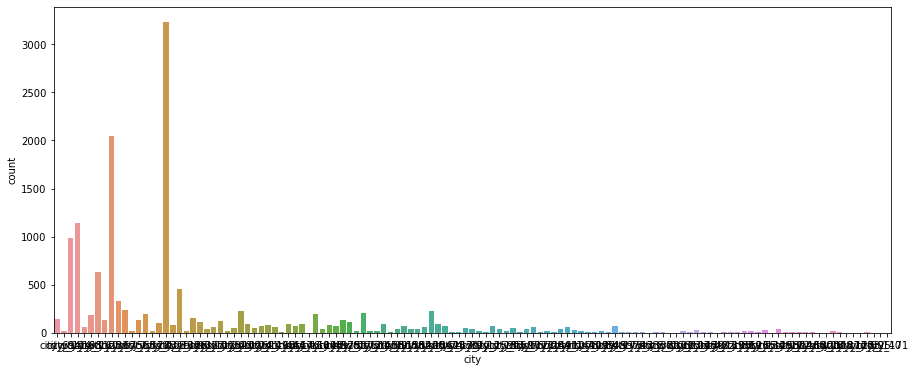

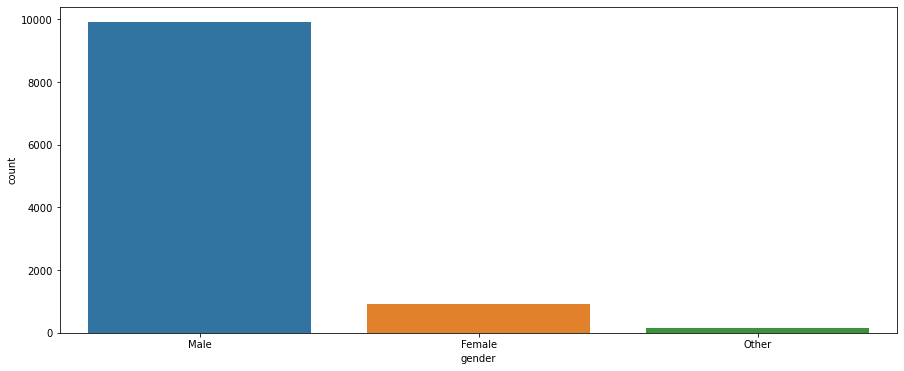

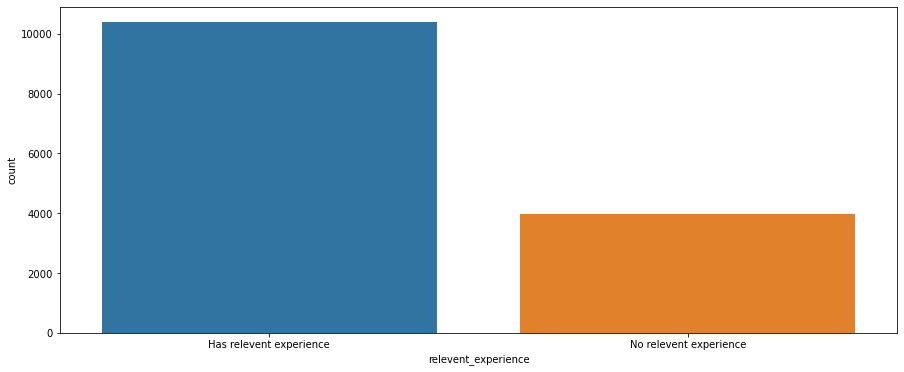

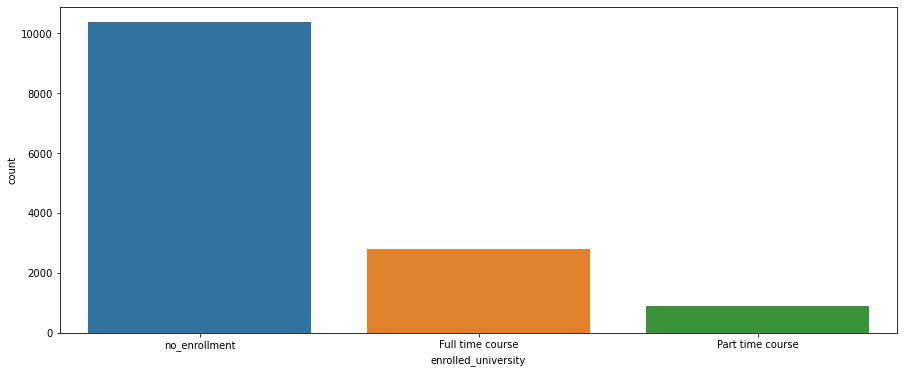

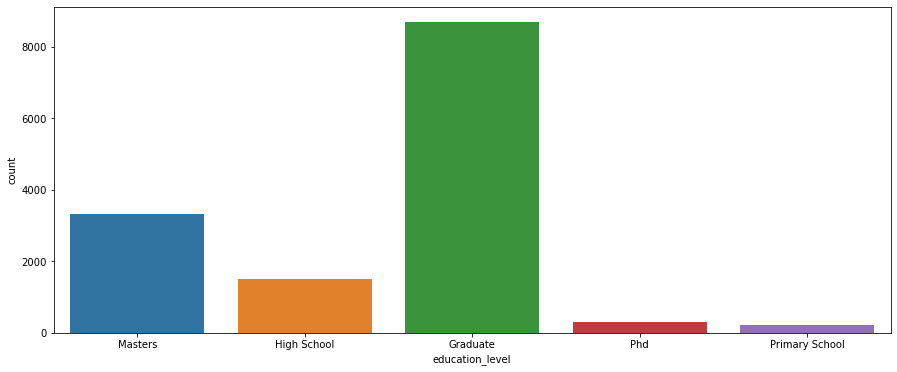

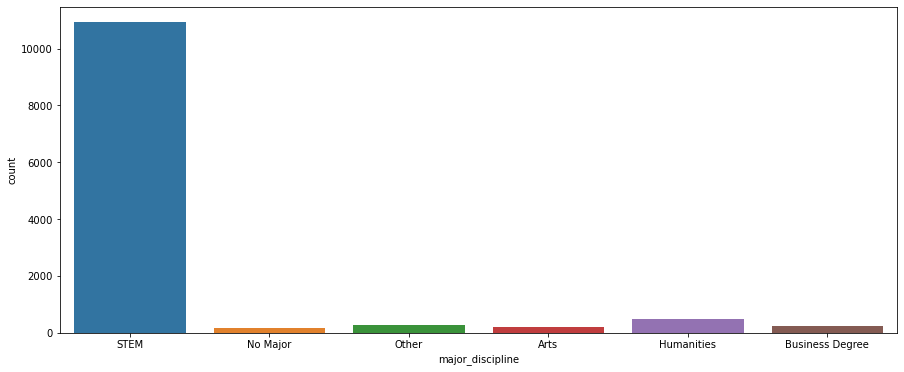

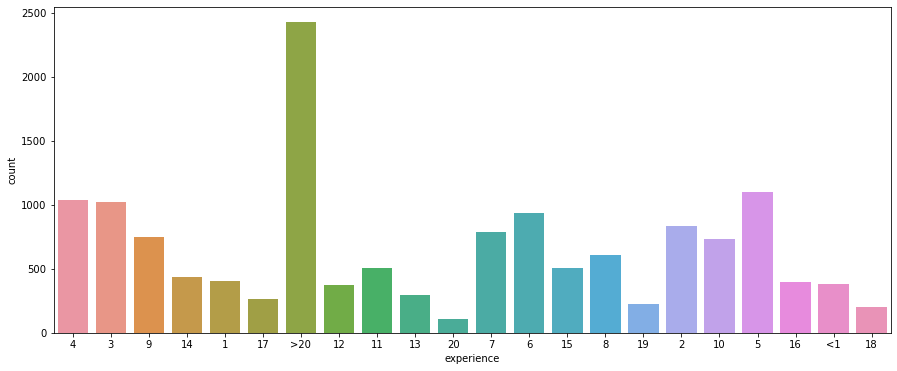

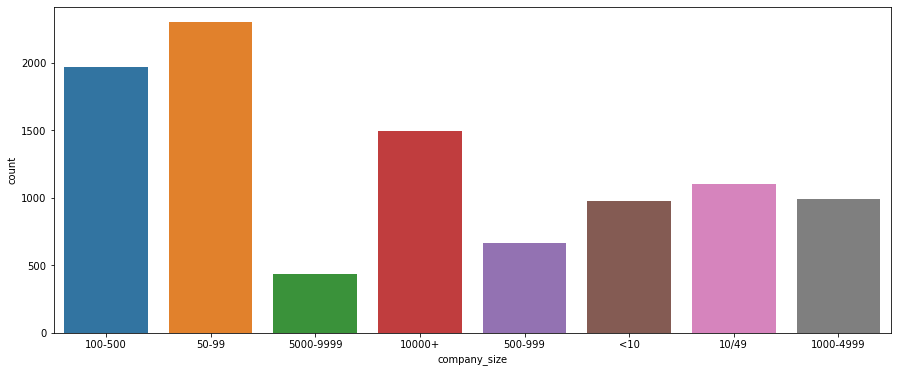

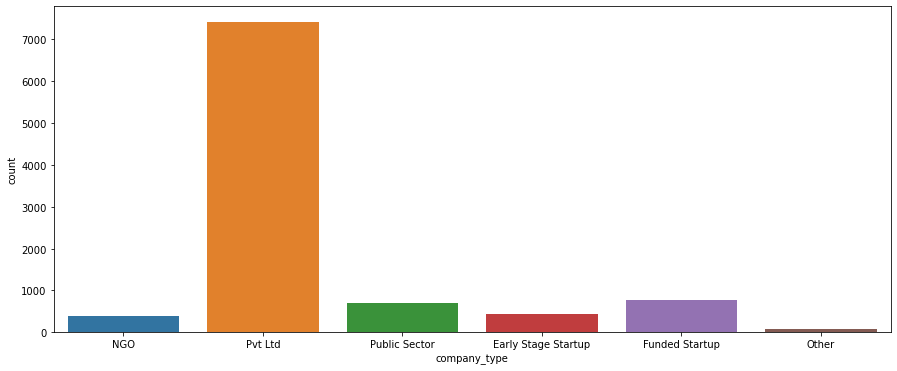

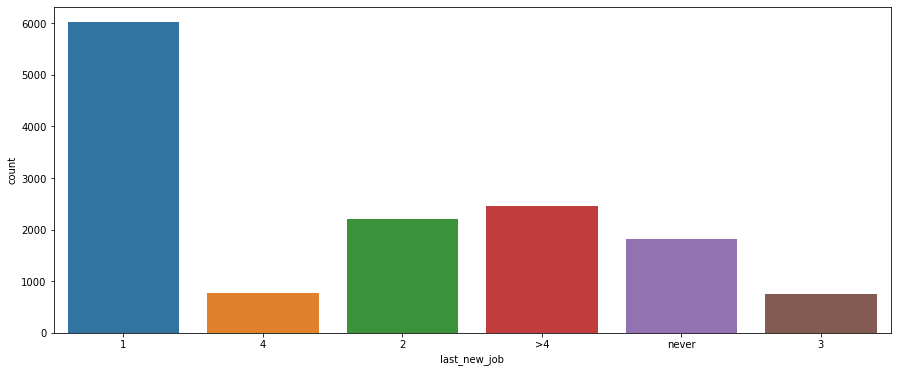

In [293]:
plot_distribution(df)

In [294]:
df.columns

Index(['index', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

## 5. Visualize the relationship of each feature with target variable 

In [295]:
def plot_distribution_target(df):
    df_numerical = df.select_dtypes(exclude=['object'])
    df_cat = df.select_dtypes(exclude=['int64','float64'])
    for col in df_numerical:
        figure = plt.figure(figsize=(15,6))
        sns.displot(df,x=col,hue="target",stat='density',element='step')
        plt.show()
    for col in df_cat:
        figure = plt.figure(figsize=(15,6))
        crosstab = pd.crosstab(df['target'],df[col])
        crosstab.plot.bar(rot=0)
        plt.show()

<Figure size 1080x432 with 0 Axes>

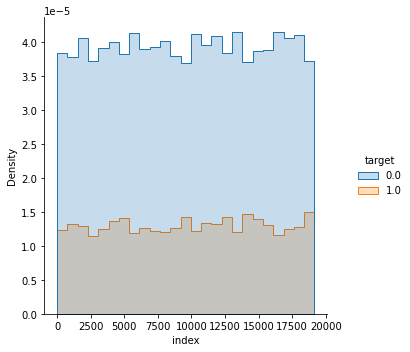

<Figure size 1080x432 with 0 Axes>

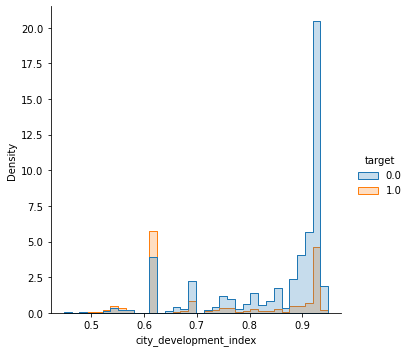

<Figure size 1080x432 with 0 Axes>

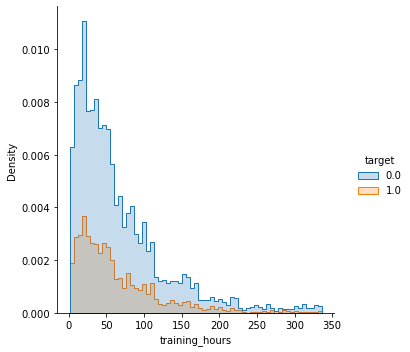

<Figure size 1080x432 with 0 Axes>

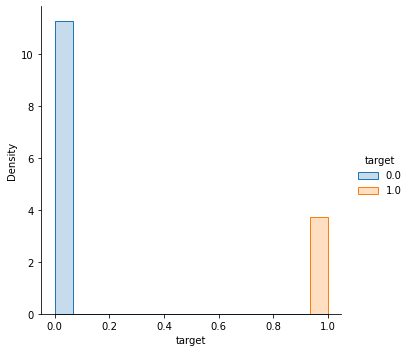

<Figure size 1080x432 with 0 Axes>

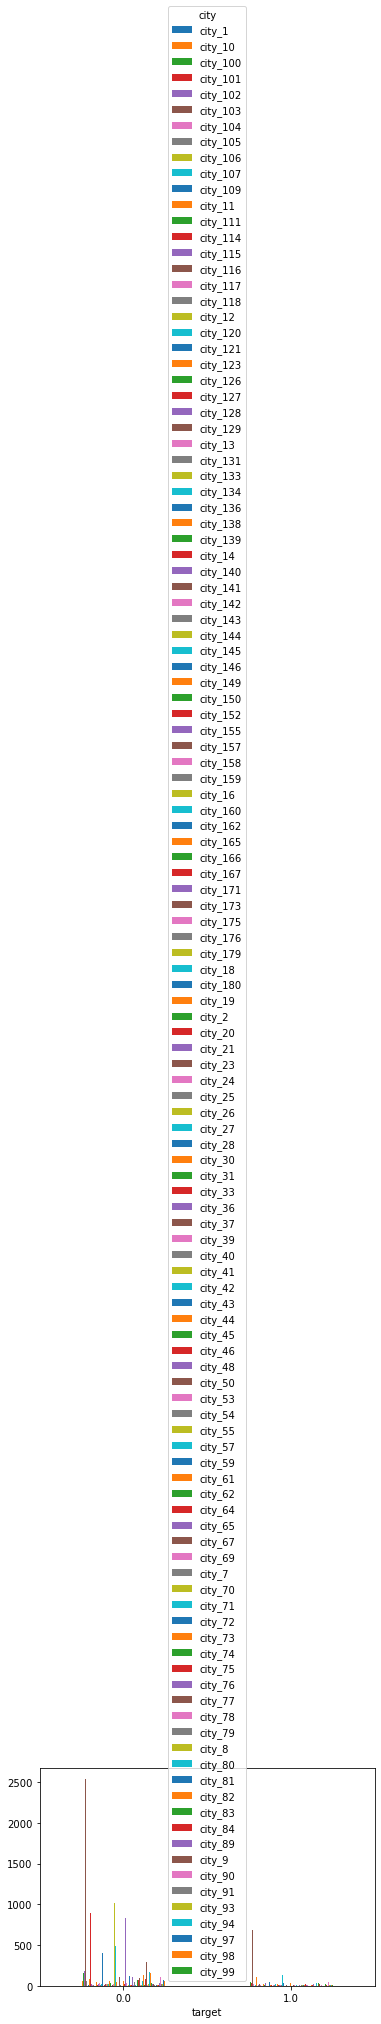

<Figure size 1080x432 with 0 Axes>

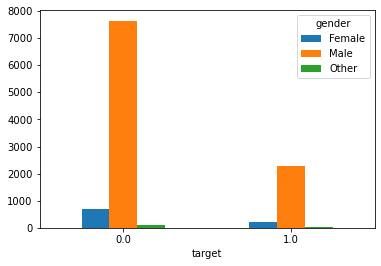

<Figure size 1080x432 with 0 Axes>

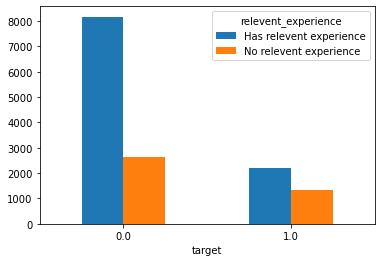

<Figure size 1080x432 with 0 Axes>

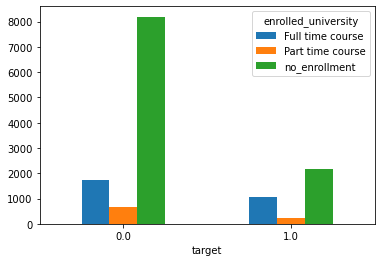

<Figure size 1080x432 with 0 Axes>

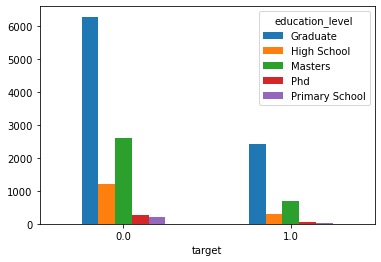

<Figure size 1080x432 with 0 Axes>

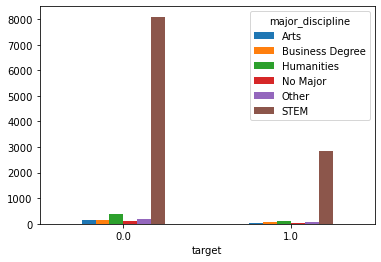

<Figure size 1080x432 with 0 Axes>

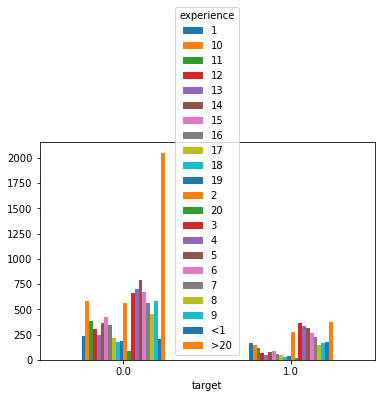

<Figure size 1080x432 with 0 Axes>

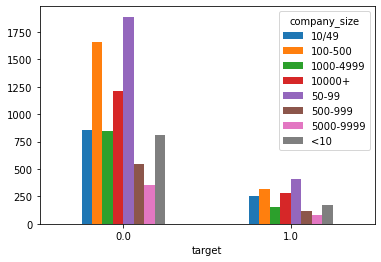

<Figure size 1080x432 with 0 Axes>

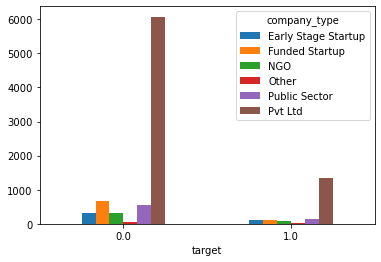

<Figure size 1080x432 with 0 Axes>

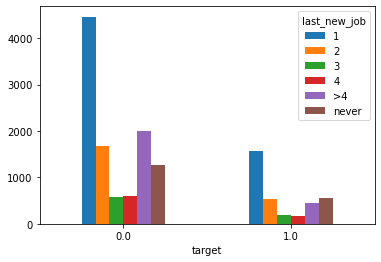

In [296]:
plot_distribution_target(train)

### 6. Handle missing values: Use any three methods to handle missing values.

In [297]:
train.shape

(14368, 14)

In [298]:
Missing = pd.DataFrame({"Column Name":train.columns,
                        "Missing Values":np.array(train.isna().sum()), 
                        "Percentage of Missing Values":np.array((train.isna().sum()/train.shape[0])*100)}).set_index("Column Name")
Missing

,Missing Values,Percentage of Missing Values
Column Name,,
index,0,0.000000
city,0,0.000000
city_development_index,0,0.000000
gender,3393,23.614978
relevent_experience,0,0.000000
enrolled_university,292,2.032294
education_level,338,2.352450
major_discipline,2089,14.539254
experience,45,0.313196


In [299]:
Missing_test = pd.DataFrame({"Column Name":test.columns,
                        "Missing Values":np.array(test.isna().sum()), 
                        "Percentage of Missing Values":np.array((test.isna().sum()/test.shape[0])*100)}).set_index("Column Name")
Missing_test

,Missing Values,Percentage of Missing Values
Column Name,,
index,0,0.000000
city,0,0.000000
city_development_index,0,0.000000
gender,1115,23.277662
relevent_experience,0,0.000000
enrolled_university,94,1.962422
education_level,122,2.546973
major_discipline,724,15.114823
experience,20,0.417537


/Users/priyankjagad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

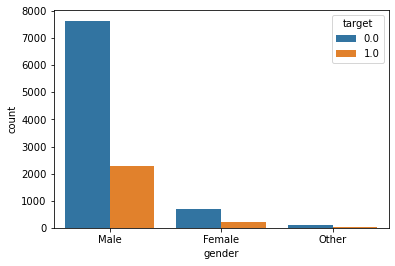

In [300]:
sns.countplot("gender",hue="target",data=train)

In [301]:
train['gender'] = train['gender'].fillna(train['gender'].mode()[0])

In [302]:
test['gender'] = test['gender'].fillna(test['gender'].mode()[0])

In [303]:
test['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

/Users/priyankjagad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='major_discipline', ylabel='count'>

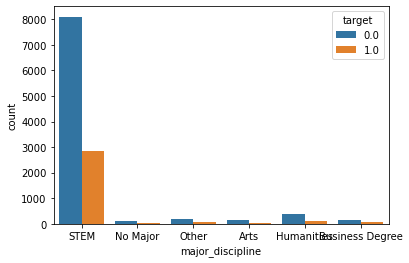

In [304]:
sns.countplot("major_discipline",hue="target",data=train)

In [305]:
train['enrolled_university'].unique()

array(['no_enrollment', nan, 'Full time course', 'Part time course'],
      dtype=object)

In [306]:
train['education_level'].unique()

array(['Masters', 'High School', 'Graduate', 'Phd', nan, 'Primary School'],
      dtype=object)

In [307]:
train['major_discipline'].unique()

array(['STEM', nan, 'No Major', 'Other', 'Arts', 'Humanities',
       'Business Degree'], dtype=object)

In [310]:
train.shape

(14368, 14)

In [311]:
# Drop rows with atleast 3 

In [312]:
train.isna().sum()

index                        0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        292
education_level            338
major_discipline          2089
experience                  45
company_size              4430
company_type              4598
last_new_job               327
training_hours               0
target                       0
dtype: int64

In [313]:
train['enrolled_university'].fillna(train['enrolled_university'].mode()[0],inplace=True)

In [314]:
test['enrolled_university'].fillna(train['enrolled_university'].mode()[0],inplace=True)

In [315]:
train['education_level'].mode()[0]

'Graduate'

In [316]:
train['major_discipline'] = train['major_discipline'].fillna(train['major_discipline'].mode()[0])
train['education_level'] = train['education_level'].fillna(train['education_level'].mode()[0])

In [317]:
test['major_discipline'] = test['major_discipline'].fillna(train['major_discipline'].mode()[0])
test['education_level'] = test['education_level'].fillna(train['education_level'].mode()[0])

In [318]:
train['major_discipline'].unique()

array(['STEM', 'No Major', 'Other', 'Arts', 'Humanities',
       'Business Degree'], dtype=object)

In [319]:
train['experience'].replace({"<1":0.5,
                         ">20":21},inplace=True)

In [320]:
test['experience'].replace({"<1":0.5,
                         ">20":21},inplace=True)

In [321]:
train['experience']= train['experience'].astype(float)

In [322]:
test['experience']= test['experience'].astype(float)

In [323]:
train['experience'].fillna(train['experience'].mode()[0],inplace=True)
test['experience'].fillna(train['experience'].mode()[0], inplace=True)

In [324]:
print(train['company_size'].unique())
print(train['company_type'].unique())

['100-500' nan '50-99' '5000-9999' '10000+' '500-999' '<10' '10/49'
 '1000-4999']
['NGO' nan 'Pvt Ltd' 'Public Sector' 'Early Stage Startup'
 'Funded Startup' 'Other']


In [325]:
print(train['company_size'].mode())
print(train['company_type'].mode())

0    50-99
dtype: object
0    Pvt Ltd
dtype: object


In [326]:
train['company_size'].fillna(train['company_size'].mode()[0],inplace=True)
train['company_type'].fillna(train['company_type'].mode()[0],inplace=True)

In [327]:
test['company_size'].fillna(train['company_size'].mode()[0],inplace=True)
test['company_type'].fillna(train['company_type'].mode()[0],inplace=True)

In [328]:
train.isna().sum()

index                       0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline            0
experience                  0
company_size                0
company_type                0
last_new_job              327
training_hours              0
target                      0
dtype: int64

In [329]:
test.isna().sum()

index                      0
city                       0
city_development_index     0
gender                     0
relevent_experience        0
enrolled_university        0
education_level            0
major_discipline           0
experience                 0
company_size               0
company_type               0
last_new_job              96
training_hours             0
dtype: int64

In [330]:
train['last_new_job'].unique()

array(['1', '4', '2', '>4', 'never', '3', nan], dtype=object)

In [331]:
train['last_new_job'].replace({'>4':5,'never':0},inplace=True)
train['last_new_job'].mode()

0    1
dtype: object

In [332]:
test['last_new_job'].replace({'>4':5,'never':0},inplace=True)

In [333]:
train['last_new_job'].fillna(train['last_new_job'].mode()[0],inplace=True)

In [334]:
test['last_new_job'].fillna(train['last_new_job'].mode()[0],inplace=True)

In [335]:
train['last_new_job']=train['last_new_job'].astype(int)

In [336]:
test['last_new_job']=test['last_new_job'].astype(int)

In [337]:
train.isna().sum()

index                     0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [338]:
test.isna().sum()

index                     0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

## 8.Scale the features for models that require scaling and perform required pre-processing 

In [339]:
train['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [340]:
train['relevent_experience'] = train['relevent_experience'].map({'Has relevent experience':1,
                              'No relevent experience':0})

In [341]:
test['relevent_experience'] = test['relevent_experience'].map({'Has relevent experience':1,
                              'No relevent experience':0})

In [342]:
train['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

In [343]:
train1 = pd.get_dummies(train['enrolled_university']).drop('Full time course',axis=1)
train1


,Part time course,no_enrollment
0,0,1
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
14363,0,1
14364,0,1
14365,0,1
14366,0,1


In [344]:
test1 = pd.get_dummies(test['enrolled_university']).drop('Full time course',axis=1)
test1

,Part time course,no_enrollment
0,0,1
1,0,1
2,0,0
3,0,1
4,0,1
...,...,...
4785,0,0
4786,0,1
4787,0,1
4788,0,0


In [345]:
train_copy = pd.concat([train1,train],axis=1)
test_copy = pd.concat([test1,test],axis=1)

In [346]:
train_copy.drop('enrolled_university',axis=1,inplace=True)
test_copy.drop('enrolled_university',axis=1,inplace=True)

In [347]:
train_copy['education_level'].unique()

array(['Masters', 'High School', 'Graduate', 'Phd', 'Primary School'],
      dtype=object)

In [348]:
train_copy['education_level']= train_copy['education_level'].map({'Masters':3,
                                 'Graduate':3,
                                'Phd':4,
                                'High School':2,
                                'Primary School':1})

In [349]:
test_copy['education_level']= test_copy['education_level'].map({'Masters':3,
                                 'Graduate':3,
                                'Phd':4,
                                'High School':2,
                                'Primary School':1})

In [350]:
train_copy['major_discipline'].unique()

array(['STEM', 'No Major', 'Other', 'Arts', 'Humanities',
       'Business Degree'], dtype=object)

In [351]:
train2 = pd.get_dummies(train_copy['major_discipline']).drop('Other',axis=1)
train_copy = pd.concat([train2,train_copy],axis=1)
train_copy = train_copy.drop('major_discipline',axis=1)

In [352]:
test2 = pd.get_dummies(test_copy['major_discipline']).drop('Other',axis=1)
test_copy = pd.concat([test2,test_copy],axis=1)
test_copy = test_copy.drop('major_discipline',axis=1)

In [353]:
train_copy['company_size'].unique()

array(['100-500', '50-99', '5000-9999', '10000+', '500-999', '<10',
       '10/49', '1000-4999'], dtype=object)

In [354]:
company_size  = pd.get_dummies(train_copy['company_size']).drop('<10',axis=1)
train_copy = pd.concat([company_size,train_copy],axis=1)
train_copy.drop('company_size',axis=1,inplace=True)

In [355]:
test_company_size  = pd.get_dummies(test_copy['company_size']).drop('<10',axis=1)
test_copy = pd.concat([test_company_size,test_copy],axis=1)
test_copy.drop('company_size',axis=1,inplace=True)

In [356]:
train_copy['company_type'].unique()

array(['NGO', 'Pvt Ltd', 'Public Sector', 'Early Stage Startup',
       'Funded Startup', 'Other'], dtype=object)

In [357]:
train3 = pd.get_dummies(train_copy['company_type']).drop('Other',axis=1)
train_copy = pd.concat([train3,train_copy],axis=1)
train_copy.drop('company_type',axis=1,inplace=True)

In [358]:
test3 = pd.get_dummies(test_copy['company_type']).drop('Other',axis=1)
test_copy = pd.concat([test3,test_copy],axis=1)
test_copy.drop('company_type',axis=1,inplace=True)

In [359]:
train_copy['last_new_job'].unique()

array([1, 4, 2, 5, 0, 3])

In [360]:
train_copy['training_hours'].unique()

array([ 22,  88,  91,  92,  18,   7, 276,  69,  16,  39,  40,  13, 134,
        28, 278,  21,  51,  11,  56,  29, 202,  20, 125, 104,  61,  14,
        72, 135, 156,  37,  52,  99, 204, 102,  43,  15, 106,  12,  50,
        47,  41,  17,  25,   6, 146,   5,   4,  36, 108,  10,  34,  24,
        58, 112,  95,  84, 100,   8, 286,  55,  33,   3,  90, 111,  46,
        63, 190,  89, 166,  23,  44, 306,  76, 188,  53, 122,  64,  74,
        70, 105, 107,  66,   9, 232, 244, 298, 210, 140, 178,  75,  54,
       124,  42,  65, 154, 262, 176, 138,  97,  30,  78,  80, 180,  26,
        48,   2,  94,  98, 119,  57, 103,  60, 264,  19,  62, 150, 128,
       240, 113, 158,  35, 155, 168,  45,  49,  83,  77,  79, 145, 141,
        96, 149,  82,  32, 200, 246,  38,  68, 308,  85, 160,  31, 139,
       182, 157, 152,  71, 162, 144, 222,  73, 101, 272, 206, 326, 196,
       214,  67, 170, 114,  81, 110, 316, 109, 117, 294, 328, 270, 131,
       136, 198,  86,  87, 242, 314, 302, 292, 192, 163, 126, 12

In [361]:
train_copy['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [362]:
train4= pd.get_dummies(train_copy['gender']).drop('Female',axis=1)
train_copy = pd.concat([train4,train_copy],axis=1)
train_copy.drop('gender',axis=1,inplace=True)

In [363]:
test4= pd.get_dummies(test_copy['gender']).drop('Female',axis=1)
test_copy = pd.concat([test4,test_copy],axis=1)
test_copy.drop('gender',axis=1,inplace=True)

In [364]:
y = train_copy['target']
x= train_copy.drop(['target','index','city'],axis=1)

In [365]:
test_data = test_copy.drop(['index',"city"],axis=1)

In [366]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(x)
x = sc.fit_transform(x)
test_data = sc.fit_transform(test_data)

## 9. Explain the following terms in detail

### a. Pearson’s correlation

1) Pearson's correlation: Correlation means to find out the association between the two variables and Correlation coefficients are used to find out how strong the is relationship between the two variables. Pearson's Correlation is used to determine linear association between two continuius varaibles using the given formulae


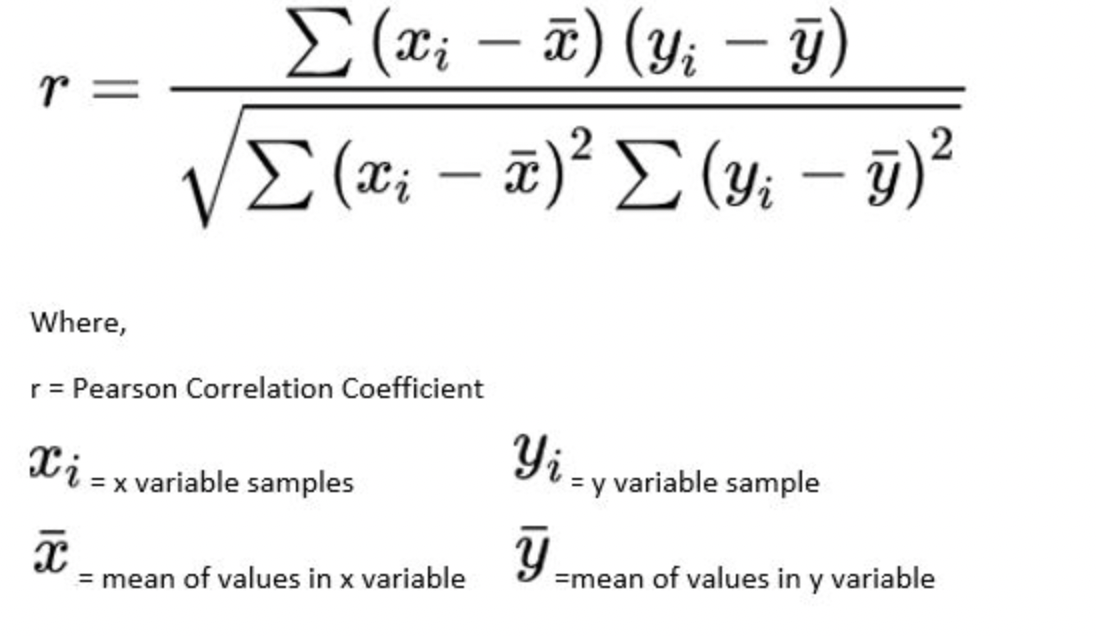

Value of r ranges from ‘-1’ to ‘+1’. Value ‘0’ specifies that there is no relation between the two variables. A value greater than ‘0’ indicates a positive relationship between two variables where an increase in the value of one variable increases the value of another variable. Value less than ‘0’ indicates a negative relationship between two variables where an increase in the value of one decreases the value of another variable. Pearson corelation draws best fit line between 2 variables

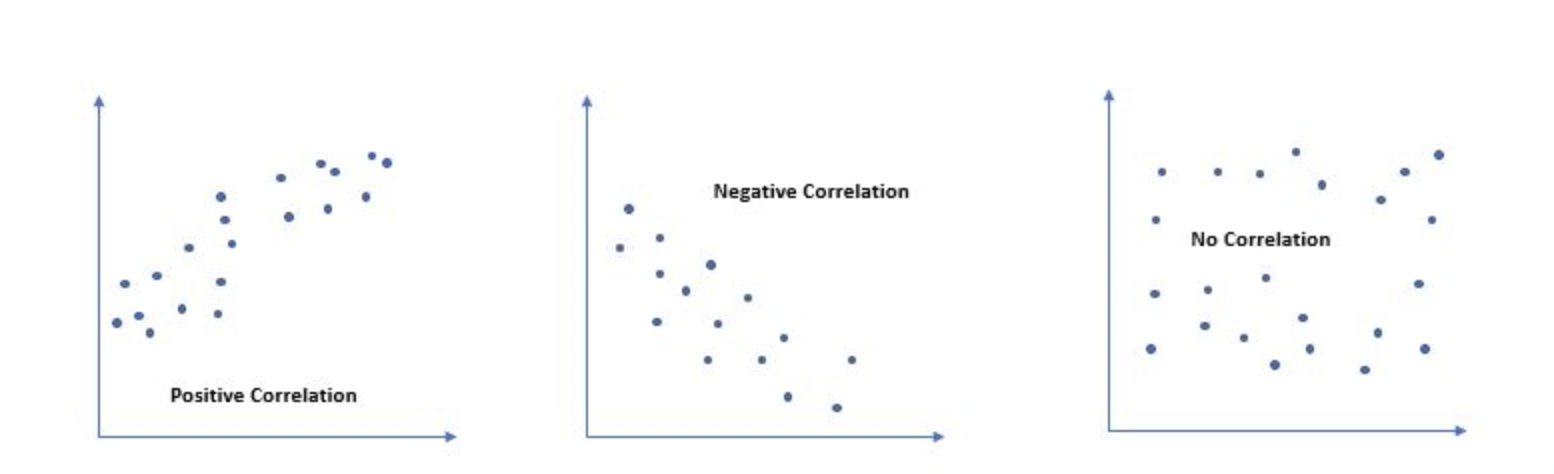

### b. T – test 

2) T-Test:
    The t-test, also known as t-statistic or sometimes t-distribution, is a popular statistical tool used to test differences between the means (averages) of two groups, or the difference between one group’s mean and a standard value. 
    
If t-value is large => the two groups belong to different groups. 
If t-value is small => the two groups belong to same group.

Independent sample t-test, commonly known as unpaired sample t-test is used to find out if the differences found between two groups is actually significant or just a random occurrence. 

### c. Chi squared test

3) Pearson's chi squared Test:
The Pearson’s Chi-Square statistical hypothesis is a test for independence between categorical variables. 

Null hypothesis:
We start by defining the null hypothesis (H0) which states that there is no relation between the variables. An alternate hypothesis would state that there is a significant relation between the two.

We define a significance factor to determine whether the relation between the variables is of considerable significance. Generally a significance factor or alpha value of 0.05 is chosen. This alpha value denotes the probability of erroneously rejecting H0 when it is true. A lower alpha value is chosen in cases where we expect more precision. If the p-value for the test comes out to be strictly greater than the alpha value, then H0 holds true.

If our calculated value of chi-square is less or equal to the tabular(also called critical) value of chi-square, then H0 holds true.



##  10. Perform Pearson correlation between continuous features and plot the heatmap of the correlation matrix.

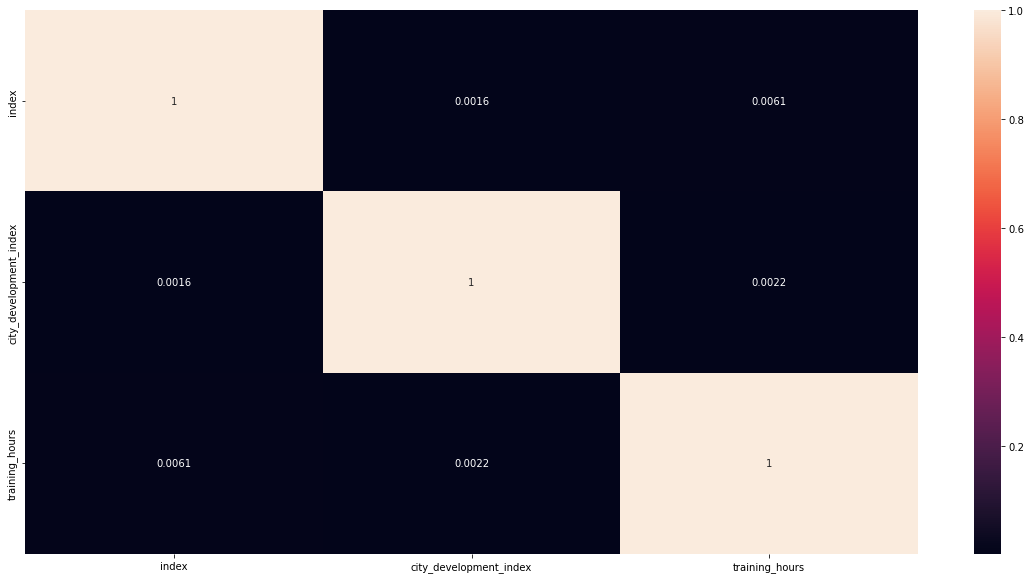

In [368]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(continuous_values_for_testing.corr(),annot=True)
plt.show()

## 11. Perform t test on continuous features after dividing them using target variable.

In [367]:
from scipy.stats import ttest_ind
continuous_values_for_testing  = df.select_dtypes(exclude=['object'])
for col in continuous_values_for_testing.columns:
    df_temp=train[[col,"target"]].copy()
    print("T-test on column:",col)
    df_not_looking_for_job = df_temp[df_temp["target"]==0].copy()
    df_looking_for_job = df_temp[df_temp["target"]==1].copy()
    print(ttest_ind(df_not_looking_for_job[col], df_looking_for_job[col]))
    print("#"*100)

T-test on column: index
Ttest_indResult(statistic=-0.6519542575724321, pvalue=0.5144411115382848)
####################################################################################################
T-test on column: city_development_index
Ttest_indResult(statistic=44.19885459032697, pvalue=0.0)
####################################################################################################
T-test on column: training_hours
Ttest_indResult(statistic=2.5347161574845214, pvalue=0.011264369540078601)
####################################################################################################


## 12 . Perform  Chi  squared  test  among  categorical  variables  and  with  the  target  variable 

In [549]:
def chi2_by_hand(df, col1, col2):    
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()            
        
    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('---Chi-Square---')
    display(df_chi2)
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    return chi_square_score, degree_f

In [557]:
df2 = pd.read_csv("x_train.csv")
df3 = pd.read_csv("y_train.csv",usecols = ['target'])
df2 = pd.concat([df2,df3],axis=1)

cols = df2.select_dtypes(exclude = ['int64' , 'float64']).columns
for col in cols:
    c,d = chi2_by_hand(df2,col,"target")
# The degree of freedom p value is compared to total calculated value if it is less then Null hypothesis accepted and there is no significant relation with target variable else there is significant relation between target variable
    

---Chi-Square---


target,0.0,1.0,Total
city,,,
city_1,0.721763,2.188788,2.910551
city_10,1.348474,4.089323,5.437797
city_100,0.383662,1.163476,1.547138
city_101,8.972714,27.210266,36.182981
city_102,1.001093,3.035872,4.036965
...,...,...,...
city_94,1.520227,4.610175,6.130402
city_97,2.245446,6.809443,9.054890
city_98,1.635007,4.958250,6.593257


---Chi-Square---


target,0.0,1.0,Total
gender,,,
Female,0.485544,1.612428,2.097972
Male,0.078440,0.260487,0.338927
Other,0.316421,1.050792,1.367213
Total,0.880405,2.923707,3.804112


---Chi-Square---


target,0.0,1.0,Total
relevent_experience,,,
Has relevent experience,16.529257,50.125912,66.655169
No relevent experience,43.097247,130.694851,173.792098
Total,59.626504,180.820763,240.447267


---Chi-Square---


target,0.0,1.0,Total
enrolled_university,,,
Full time course,67.455458,206.018916,273.474373
Part time course,0.094515,0.288664,0.383179
no_enrollment,19.068667,58.238520,77.307186
Total,86.618640,264.546099,351.164738


---Chi-Square---


target,0.0,1.0,Total
education_level,,,
Graduate,9.422514,28.434838,37.857352
High School,4.790368,14.456156,19.246524
Masters,5.703036,17.210365,22.913401
Phd,3.405074,10.275679,13.680753
Primary School,4.314101,13.018900,17.333002
Total,27.635094,83.395938,111.031031


---Chi-Square---


target,0.0,1.0,Total
major_discipline,,,
Arts,0.704556,2.037519,2.742075
Business Degree,0.209467,0.605762,0.815229
Humanities,0.951806,2.752545,3.704351
No Major,0.000295,0.000853,0.001148
Other,0.017385,0.050276,0.067661
STEM,0.076379,0.220881,0.297259
Total,1.959888,5.667835,7.627724


---Chi-Square---


target,0.0,1.0,Total
experience,,,
1,14.157145,42.994148,57.151293
10,1.670103,5.071973,6.742077
11,0.172501,0.523872,0.696373
12,2.592998,7.874733,10.467730
13,2.280122,6.924552,9.204674
14,2.822926,8.573007,11.395934
15,3.989742,12.116537,16.106279
16,6.883864,20.905759,27.789623
17,2.009380,6.102331,8.111711


---Chi-Square---


target,0.0,1.0,Total
company_size,,,
10/49,3.182669,14.646736,17.829405
100-500,0.868449,3.996627,4.865076
1000-4999,0.967471,4.452330,5.419801
10000+,0.244167,1.123661,1.367828
50-99,0.002692,0.012391,0.015083
500-999,0.000512,0.002356,0.002868
5000-9999,0.000082,0.000376,0.000458
<10,0.068248,0.314081,0.382329
Total,5.334290,24.548558,29.882848


---Chi-Square---


target,0.0,1.0,Total
company_type,,,
Early Stage Startup,2.303022,10.232089,12.535111
Funded Startup,1.319543,5.862595,7.182138
NGO,0.004521,0.020087,0.024609
Other,0.128652,0.571587,0.700239
Public Sector,0.909144,4.039233,4.948377
Pvt Ltd,0.115291,0.512227,0.627518
Total,4.780173,21.237818,26.017991


---Chi-Square---


target,0.0,1.0,Total
last_new_job,,,
1,1.458524,4.487798,5.946321
2,0.201082,0.618717,0.819798
3,0.037799,0.116306,0.154105
4,0.429956,1.322951,1.752907
>4,11.509069,35.412776,46.921845
never,7.826263,24.080985,31.907248
Total,21.462692,66.039532,87.502225


## 13 . Compare the features selected using visualization from question 5 and using the statistical tests from the previous three questions. 

<AxesSubplot:>

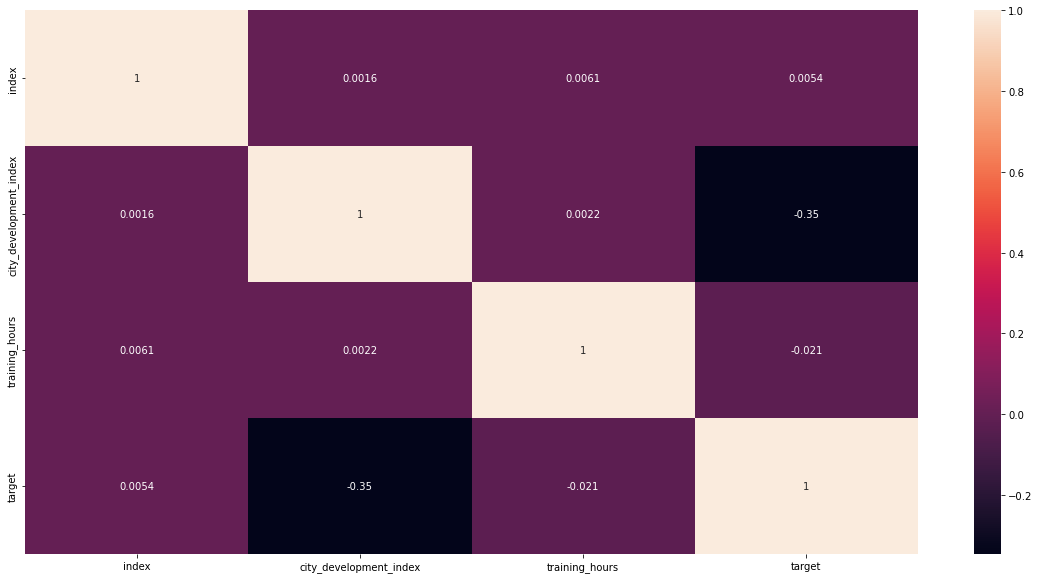

In [548]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True)

Here the index column has very less pearson correlation with target column so we can remove that column

As per the chi test we can drop gender categorical column which has less relation with target variable

## 14. Explain the following terms:

### a. Forward Selection

1) Forward Selection: It is a variable selection method.
This process starts with the empty model and starts to add the most significant features one by one
Until a pre-specified stopping rule is reached or until there's no more variable left.
The stopping rule is satisfied when all remaining variables to consider have a p-value larger than some specified threshold, if added to the model.

When we reach this state, forward selection will terminate and return a model that only contains variables with p-values < threshold.

### b. Backward Elimination

2) Backward Elimination: It is a variable selection method but instead of adding new variables in the model. we start with the model which has all the variables and then one by one we remove the least significant variable 
from it. We repeat this process untill there's no more variable or if we reach any pre defined rule.

In first step, we will train our model with all features and generate accuracy. Then we will remove one feature each time and train the model and get accuracy. We will drop the variable having less difference with total accuracy. we will repeat all these steps until no more variables can be dropped


### c. Recursive feature elimination

3) RFE is a feature selection algorithm that also uses filter-based feature selection internally.

RFE works by searching for a subset of features by starting with all features in the training set and successfully removing features until the desired number remains.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

In [369]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## 16. Train at least 5 different classification models on the final data

### Using Logistic Regression for classification

In [372]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [373]:
predictions = lr.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[2029  137]
 [ 515  193]]
0.7731384829505915
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      2166
         1.0       0.58      0.27      0.37       708

    accuracy                           0.77      2874
   macro avg       0.69      0.60      0.62      2874
weighted avg       0.75      0.77      0.74      2874



### Using Decision Tree to identify correct classification

In [517]:
from sklearn.tree import DecisionTreeClassifier
dr = DecisionTreeClassifier()
dr.fit(x_train,y_train)

DecisionTreeClassifier()

In [520]:
predictions1 = dr.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(confusion_matrix(y_test,predictions1))
print(accuracy_score(y_test,predictions1))
print(classification_report(y_test,predictions1))

[[1706  460]
 [ 417  291]]
0.6948503827418232
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80      2166
         1.0       0.39      0.41      0.40       708

    accuracy                           0.69      2874
   macro avg       0.60      0.60      0.60      2874
weighted avg       0.70      0.69      0.70      2874



In [521]:
param_grid = {"criterion":["gini","entropy"],b
             "splitter":["best", "random"],
             "max_depth":[1,2,6,8,10,20,30],
             "min_samples_split":[2,3,4,5],
             "min_samples_leaf":[1,2,3,4,5],
             "max_features":['auto','sqrt','log2']}

In [522]:
from sklearn.model_selection import GridSearchCV
griddr = GridSearchCV(dr,param_grid,cv=5)
griddr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 6, 8, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [523]:
predictions3 = griddr.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(confusion_matrix(y_test,predictions3))
print(accuracy_score(y_test,predictions3))
print(classification_report(y_test,predictions3))

[[1975  191]
 [ 423  285]]
0.7863604732080723
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.87      2166
         1.0       0.60      0.40      0.48       708

    accuracy                           0.79      2874
   macro avg       0.71      0.66      0.67      2874
weighted avg       0.77      0.79      0.77      2874



## Using Random Forest to identify correct classification

In [510]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(max_depth=10,random_state=43,criterion='entropy',n_estimators =200,min_samples_split = 6,min_samples_leaf=2)

rc.fit(x_train_scaled,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=6, n_estimators=200, random_state=43)

In [511]:
predictions = rc.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[2010  156]
 [ 441  267]]
0.7922755741127349
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      2166
         1.0       0.63      0.38      0.47       708

    accuracy                           0.79      2874
   macro avg       0.73      0.65      0.67      2874
weighted avg       0.77      0.79      0.77      2874



In [374]:
rf_parameters = {"n_estimators":[100,150,200],
                "criterion":["gini", "entropy"],
                "max_depth":[2,5,10],
                "min_samples_split":[2,4,6],
                "min_samples_leaf":[1,2,4],
                "max_features":["auto","sqrt","log2"]}

In [381]:
from sklearn.model_selection import GridSearchCV
gridrf = GridSearchCV(rc,rf_parameters,cv=5)
gridrf.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, n_estimators=200,
                                              random_state=43),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]})

In [393]:
gridrf.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [382]:
predictions2 = gridrf.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(confusion_matrix(y_test,predictions2))
print(accuracy_score(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[2013  153]
 [ 457  251]]
0.7877522616562282
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87      2166
         1.0       0.62      0.35      0.45       708

    accuracy                           0.79      2874
   macro avg       0.72      0.64      0.66      2874
weighted avg       0.77      0.79      0.77      2874



### Using Naive Bayes for correct Classification

In [389]:
from sklearn.naive_bayes import BernoulliNB
gb = BernoulliNB()

In [390]:
gb_parameters = {'alpha':[1,2,5,10]}

In [391]:
gridgb = GridSearchCV(gb,gb_parameters,cv=5)
gridgb.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(), param_grid={'alpha': [1, 2, 5, 10]})

In [392]:
predictions3 = gridgb.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(confusion_matrix(y_test,predictions3))
print(accuracy_score(y_test,predictions3))
print(classification_report(y_test,predictions3))

[[1942  224]
 [ 561  147]]
0.7268615170494085
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.83      2166
         1.0       0.40      0.21      0.27       708

    accuracy                           0.73      2874
   macro avg       0.59      0.55      0.55      2874
weighted avg       0.68      0.73      0.69      2874



### Using SVM for correct Classification

In [412]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train,y_train)

SVC()

In [413]:
predictions = svc.predict(x_test)
accuracy_score(y_test,predictions)

0.7689631176061239

## 17. Write any one classification algorithm without using scikit-learn and train on the final  data.

In [500]:
import numpy as np 
from numpy import log,dot,exp,shape
class LogisticRegression:
    def sigmoid(self,z):
        sigmoid_value = 1/(1+exp(-z))
        return sigmoid_value
    
    def initialize_weights(self,X):
        weights = np.zeros((X.shape[1]+1,1))
        X = np.c_[np.ones((X.shape[0],1)),X]
        return weights,X
    
    def cost_function(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
    
    def fit(self,X,y,alpha=0.001,iterations=400):
        weights,X = self.initialize_weights(X)
        def cost_function(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iterations,)
        for i in range(iterations):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost_function(weights)
        self.weights = weights
        return cost_list
    
    def predict(self,X):
        z = dot(self.initialize_weights(X)[1],self.weights)
        values = []
        for i in self.sigmoid(z):
            if i>0.5:
                values.append(1)
            else:
                values.append(0)
        return values
    
lr_implementation = LogisticRegression()
lr_implementation.fit(x_train,y_train.values)    

print(classification_report(y_test,lr_implementation.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83      2166
         1.0       0.50      0.59      0.54       708

    accuracy                           0.75      2874
   macro avg       0.68      0.70      0.68      2874
weighted avg       0.77      0.75      0.76      2874



## 18 .Submit the test predictions using your model from question 14 to the Kaggle competition.

In [540]:
test_predictions = pd.Series(rc.predict_proba(test_data)[:,1],name="target")
submission5 = pd.concat([test_copy['index'],test_predictions],axis=1)
submission5.head()

,index,target
0,16834,0.100283
1,15437,0.110055
2,8549,0.199982
3,7222,0.085133
4,17054,0.110751


In [541]:
submission5.to_csv("submission5.csv")